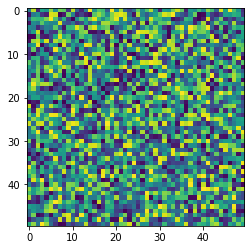

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mat = np.random.random([50,50])
plt.imshow(mat)
plt.show()

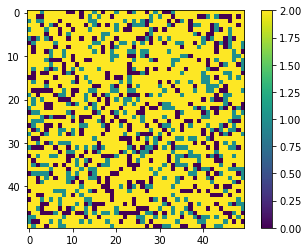

In [6]:
def makeOrderImg(imgSz, orderProbs=(0.5, 0.5)):
    nPix = imgSz**2
    img = np.zeros(nPix)
    remain = np.arange(nPix)
    if sum(orderProbs) != 1:
        raise Exception('Sum of probabilites should be 1')
    areas = []
    for p in orderProbs[:-1]:
        areas.append(np.random.choice(remain, int(nPix*p)))
        remain = np.setdiff1d(remain, areas[-1])
    areas.append(remain)
    for i,a in enumerate(areas):
        img[a] = i
    img = img.reshape(imgSz,imgSz)
    return img

img = makeOrderImg(50, (0.2,0.2,0.6))
plt.imshow(img)
plt.colorbar()
plt.show()

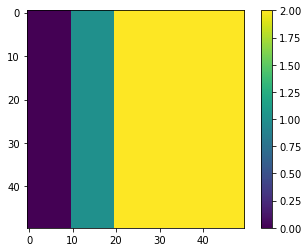

In [7]:
def makeOrderImg(sz, orderProbs=(0.5, 0.5)):
    img = np.zeros([sz, sz])
    run = 0
    for order,p in enumerate(orderProbs):
        delta = p*sz
        img[:,int(run):int(run+delta)] = order
        run = run+delta
    return img

img = makeOrderImg(50, (0.2,0.2,0.6))
plt.imshow(img)
plt.colorbar()
plt.show()

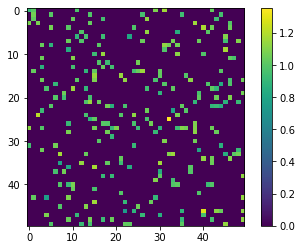

In [9]:
def makeRandomImg(sz, mu, sigma, sparsity):
    img = np.random.normal(mu, sigma, [sz, sz])
    indices = np.random.choice(np.arange(sz**2), replace=False, size=int(sparsity*sz**2))
    img[np.unravel_index(indices, img.shape)] = 0 
    return img

img = makeRandomImg(50, 1, 0.1, 0.9)
plt.imshow(img)
plt.colorbar()
plt.show()